<center><img src="img/Sante-publique-France-logo.svg.png" style="width: 500px;"/></center>

**Application au service de la santé publique : Nettoyage des données**


**Contexte :**

L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Pour y participer, il nous faut proposer une idée d’application.

**Les données :**

Nous utiliserons les données de **Open Food Fact** disponiblent à l'adresse suivante : [openfoodfacts.csv](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip). Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Principes de l'application :**

L'application que nous voulons développement doit participer à informer le grand public sur les apport nutritionnels des différents aliments que l'on peut rencontrer. Le but est de conseiller et améliorer l'alimentation des français et donc leur santé.

---

# Importation des librairies

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format


# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

Versions :

In [2]:
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
NumPy    : 1.20.3
Pandas   : 1.4.1
Seaborn  : 0.11.2


Style des tableaux :

In [3]:
%%html
<style>
    table {float:left}
</style>

---

# Importation des données

Les données regroupent des informations sur des produits alimentaires vendus dans le monde.

In [4]:
df_raw_data = pd.read_csv(
    "data/fr.openfoodfacts.org.products.csv",
    encoding='utf8',
    sep="\t",
    low_memory=False
)
df_raw_data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,

## Description des données

## Vue globale des données

In [5]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [6]:
print("")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_raw_data.shape[0],df_raw_data.shape[1]))
print("{} Code référencés.".format(len(df_raw_data['code'].unique())))
print("{} Noms de produits référencés.".format(len(df_raw_data['product_name'].unique())))

duplicates = df_raw_data.duplicated(subset=["code","product_name"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")
print("")


----------------------------------
320772 entrées et 162 variables.
320750 Code référencés.
221348 Noms de produits référencés.
Présence de données dupliquées.



## Les variables

In [7]:
print(*df_raw_data.columns, sep = "\n")

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

> Nous avons dans les données des informations sur :
> - Les pays de disponibilité des produits;
> - Les composition des produits;
> - Les apports caloriques et nutritives.

In [8]:
df_raw_data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.00,248939.00,248939.00,0.00,248939.00,0.00,0.00,261113.00,857.00,243891.00,229554.00,0.00,0.00,1.00,2.00,4.00,1.00,1.00,1.00,24.00,23.00,0.00,0.00,1.00,0.00,22823.00,22859.00,841.00,186.00,38.00,78.00,188.00,149.00,8.00,24.00,23.00,21.00,13.00,0.00,14.00,0.00,0.00,0.00,143298.00,144090.00,243588.00,244971.00,72.00,26.00,38.00,262.00,4.00,11.00,266.00,414.00,200886.00,259922.00,27.00,16.00,9.00,255510.00,255463.00,4133.00,137554.00,34.00,7057.00,1340.00,918.00,140867.00,11154.00,10815.00,11729.00,6784.00,5240.00,3042.00,5300.00,330.00,2483.00,38.00,81.00,24748.00,158.00,141050.00,5845.00,140462.00,6253.00,3929.00,2106.00,1620.00,79.00,1168.00,20.00,11.00,259.00,78.00,29.00,49.00,3036.00,165.00,948.00,0.00,268.00,221210.00,221210.00,0.00,0.00
mean,NaN,1.94,0.02,NaN,0.06,NaN,NaN,1141.91,585.50,12.73,5.13,NaN,NaN,7.40,6.04,36.14,18.90,8.10,3.00,10.75,10.67,NaN,NaN,61.00,NaN,10.43,6.31,3.18,2.25,3.19,1.64,16.23,3.82,0.06,0.15,0.06,40.19,25.12,NaN,0.00,NaN,NaN,NaN,0.07,0.02,32.07,16.00,11.84,2.88,25.90,6.35,24.33,12.16,31.92,49.79,2.86,7.08,4.66,2.51,0.02,2.03,0.80,7.84,0.00,0.52,0.00,0.06,0.03,0.02,0.33,0.26,0.02,0.02,0.01,0.21,0.00,0.12,0.07,0.01,0.12,0.42,0.09,0.13,0.62,0.00,0.53,0.01,0.03,0.00,0.01,0.00,0.00,0.00,0.00,1.59,0.15,6.43,31.46,15.41,49.55,NaN,341.70,9.17,9.06,NaN,NaN
std,NaN,2.50,0.14,NaN,0.27,NaN,NaN,6447.15,712.81,17.58,8.01,NaN,NaN,NaN,0.23,24.10,NaN,NaN,NaN,4.02,3.38,NaN,NaN,NaN,NaN,17.08,10.83,5.61,7.97,13.93,1.98,17.51,6.49,0.03,0.03,0.01,25.18,26.01,NaN,0.00,NaN,NaN,NaN,1.54,0.36,29.73,22.33,13.99,6.29,30.02,14.39,17.79,8.37,24.70,33.21,12.87,8.41,2.98,2.19,0.00,128.27,50.50,10.96,0.07,2.56,0.00,0.69,1.03,2.24,2.47,1.28,0.34,1.21,0.34,5.13,0.01,0.74,1.48,0.04,0.19,12.53,0.15,3.32,12.06,0.21,13.50,0.08,0.91,0.03,0.07,0.10,0.01,0.00,0.00,6.48,0.17,2.05,31.97,3.75,18.76,NaN,425.21,9.06,9.18,NaN,NaN
min,NaN,0.00,0.00,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,7.40,5.88,0.04,18.90,8.10,3.00,0.06,5.20,NaN,NaN,61.00,NaN,0.00,0.00,0.00,0.00,0.05,0.04,0.05,0.09,0.01,0.10,0.04,1.00,1.08,NaN,0.00,NaN,NaN,NaN,-3.57,0.00,0.00,-17.86,0.00,0.00,0.00,0.00,0.10,1.50,0.00,0.00,-6.70,-800.00,0.92,0.30

> Le dataset présente des valeurs nulles et des données sur tous les pays. Il sera nécessaire de faire un nettoyage des données pour ne garder que les informations pertinentes pour répondre à notre problématique.

# Filtrage des produits vendus en France

Pour notre application, nous allons nous concentrer sur un public français. Afin de réduire la taille des données à traiter, nous allons garder uniquement les produits disponibles en France.

La colonne **countries** regroupent les pays dans lesquels sont disponibles les produits.

    countries : list of countries where the product is sold

**Contribution des pays:**

In [9]:
df_top_countries = df_raw_data.groupby('countries')[['code']].count().reset_index()
df_top_countries = df_top_countries.sort_values(by='code', ascending=False).head(20)

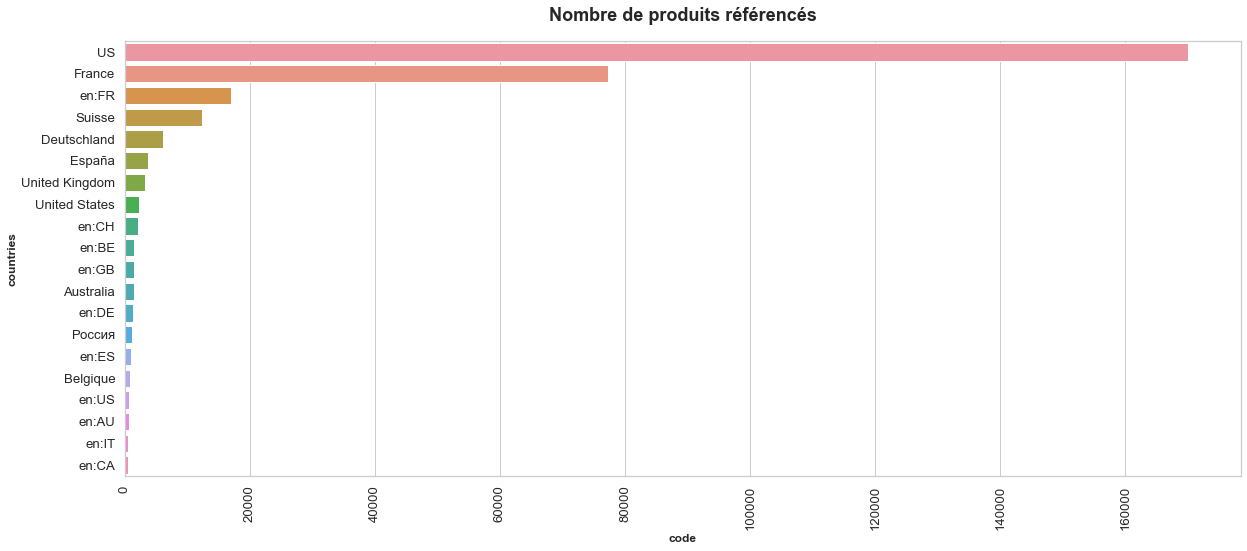

In [10]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="code", y="countries", data=df_top_countries)
ax.set_title('Nombre de produits référencés')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

> La France est l'un des pays pour lesquels nous avons le plus de données et de produits référencés.

**Filtre :**

Pour certains produits, les pays sont séparés par une virgule dans la colonne "countries". Pour récupérer toutes les données concernant la France, nous effectuons un trie sur la colonnes pour les valeurs contenant "fr".

In [11]:
df_data_fr = df_raw_data[df_raw_data['countries'].str.contains('fr', na=False, case=False)]

In [12]:
print("")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_data_fr.shape[0],df_data_fr.shape[1]))
print("{} Coutries référencés.".format(len(df_data_fr['countries'].unique())))

duplicates = df_data_fr.duplicated(subset=["code"], keep='first')
if duplicates.any():
    print("Présence de données code dupliquées.")
else:
    print("Absence de données code dupliquées.")
    
duplicates = df_data_fr.duplicated(subset=["product_name"], keep='first')
if duplicates.any():
    print("Présence de product_name dupliquées.")
else:
    print("Absence de product_name dupliquées.")

print("")


----------------------------------
98468 entrées et 162 variables.
661 Coutries référencés.
Absence de données code dupliquées.
Présence de product_name dupliquées.



> En effectuant cette sélection, nous n'avons plus de codes de références dupliqués et le nombre de produits est réduit.

# Sélection des variables

## Le Nutri-Score

**Définition :**

Une des varaiables couramment utilisée au niveau du grand public est le **nutri-grade**. Il s'agit d'un logo qui renseigne de façon simplifié sur la qualité nutritionnlle d'un produit. Il est noté de A(meilleur score) à E(moins bon score).

<center><img src="img/declinaison-logo-nutriscore.jpg" style="width: 500px;"/></center>

**Attribution :**

Le score est défini par 2 critères pour 100gr ou 100ml et dépend du calcul du nitri-score :

- en nutriments et aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive),
- en nutriments à limiter (énergie, acides gras saturés, sucres, sel).

Il nous faudra donc tenir de la qualité des produits pour notre application.

In [13]:
df_data_fr['nutrition_grade_fr'].unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

> On observe qu'il existe des produits avec un nutri-grade non renseignés.

<Figure size 1440x720 with 0 Axes>

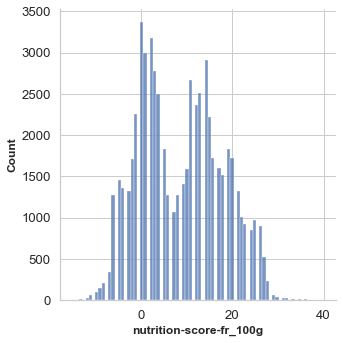

In [14]:
plt.figure(figsize=(20, 10))
ax = sns.displot(df_data_fr, x="nutrition-score-fr_100g", palette="GnBu_r")
#ax.set_title('Nutri-score')
plt.show()

## Colonnes pertinentes

### Suppression des variables vides

In [15]:
print("Nombre de colonnes du jeux de données : {}".format(df_data_fr.shape[1]))

df_data_fr.dropna(how='all', axis=1, inplace=True)
print("Nombre de colonnes restantes après suppression : {}".format(df_data_fr.shape[1]))

Nombre de colonnes du jeux de données : 162
Nombre de colonnes restantes après suppression : 136


### Sélection des variables qualitatives

In [16]:
cols_cat_to_keep = [
    'code',
    'image_url',
    'product_name',
    'pnns_groups_1',
    'pnns_groups_2',
    'origins',
    'manufacturing_places',
    'categories',
    'nutrition_grade_fr',
    'additives_n',
    'additives_fr',
    'ingredients_from_palm_oil_n',
]

| Variable | Définition | 
| --- | --- |
| code | Identifiant du produit |
| image_url | Photo ou illustration du produit |
| product_name | Nom du produit |
| pnns_groups_1 | Classement du produit |
| pnns_groups_2 | Sous-classement du produits |
| origins | Origine des ingrédients |
| manufacturing_places | Lieu de fabrication |
| categories | Catégorie du produits |
| nutrition_grade_fr | Nutri-score de A à E |
| additives_n | Nombre d'additifs |
| additives_fr | Liste des additifs |
| ingredients_from_palm_oil_n | Nombre d'ingrédients d'huile de palme |

### Sélection des variables quantitatives

On supprime les colonnes qui n'apportent pas d'informations sur les apports nutrionnelles des aliments :

In [17]:
cols_quant_to_keep = df_data_fr.columns[df_data_fr.columns.str.endswith('_100g')]
cols_quant_to_keep.to_list()

['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'lauric-acid_100g',
 'arachidic-acid_100g',
 'montanic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vi

### Sélection par taux de remplissage

Récupération des colonnes choisies :

In [18]:
all_cols_to_keep = [*cols_cat_to_keep, *cols_quant_to_keep]
df_data_fr = df_data_fr[all_cols_to_keep]

Taux de remplissage :

In [19]:
cols_filling_rate = (df_data_fr.notnull().sum() / len(df_data_fr)).sort_values(ascending=False)

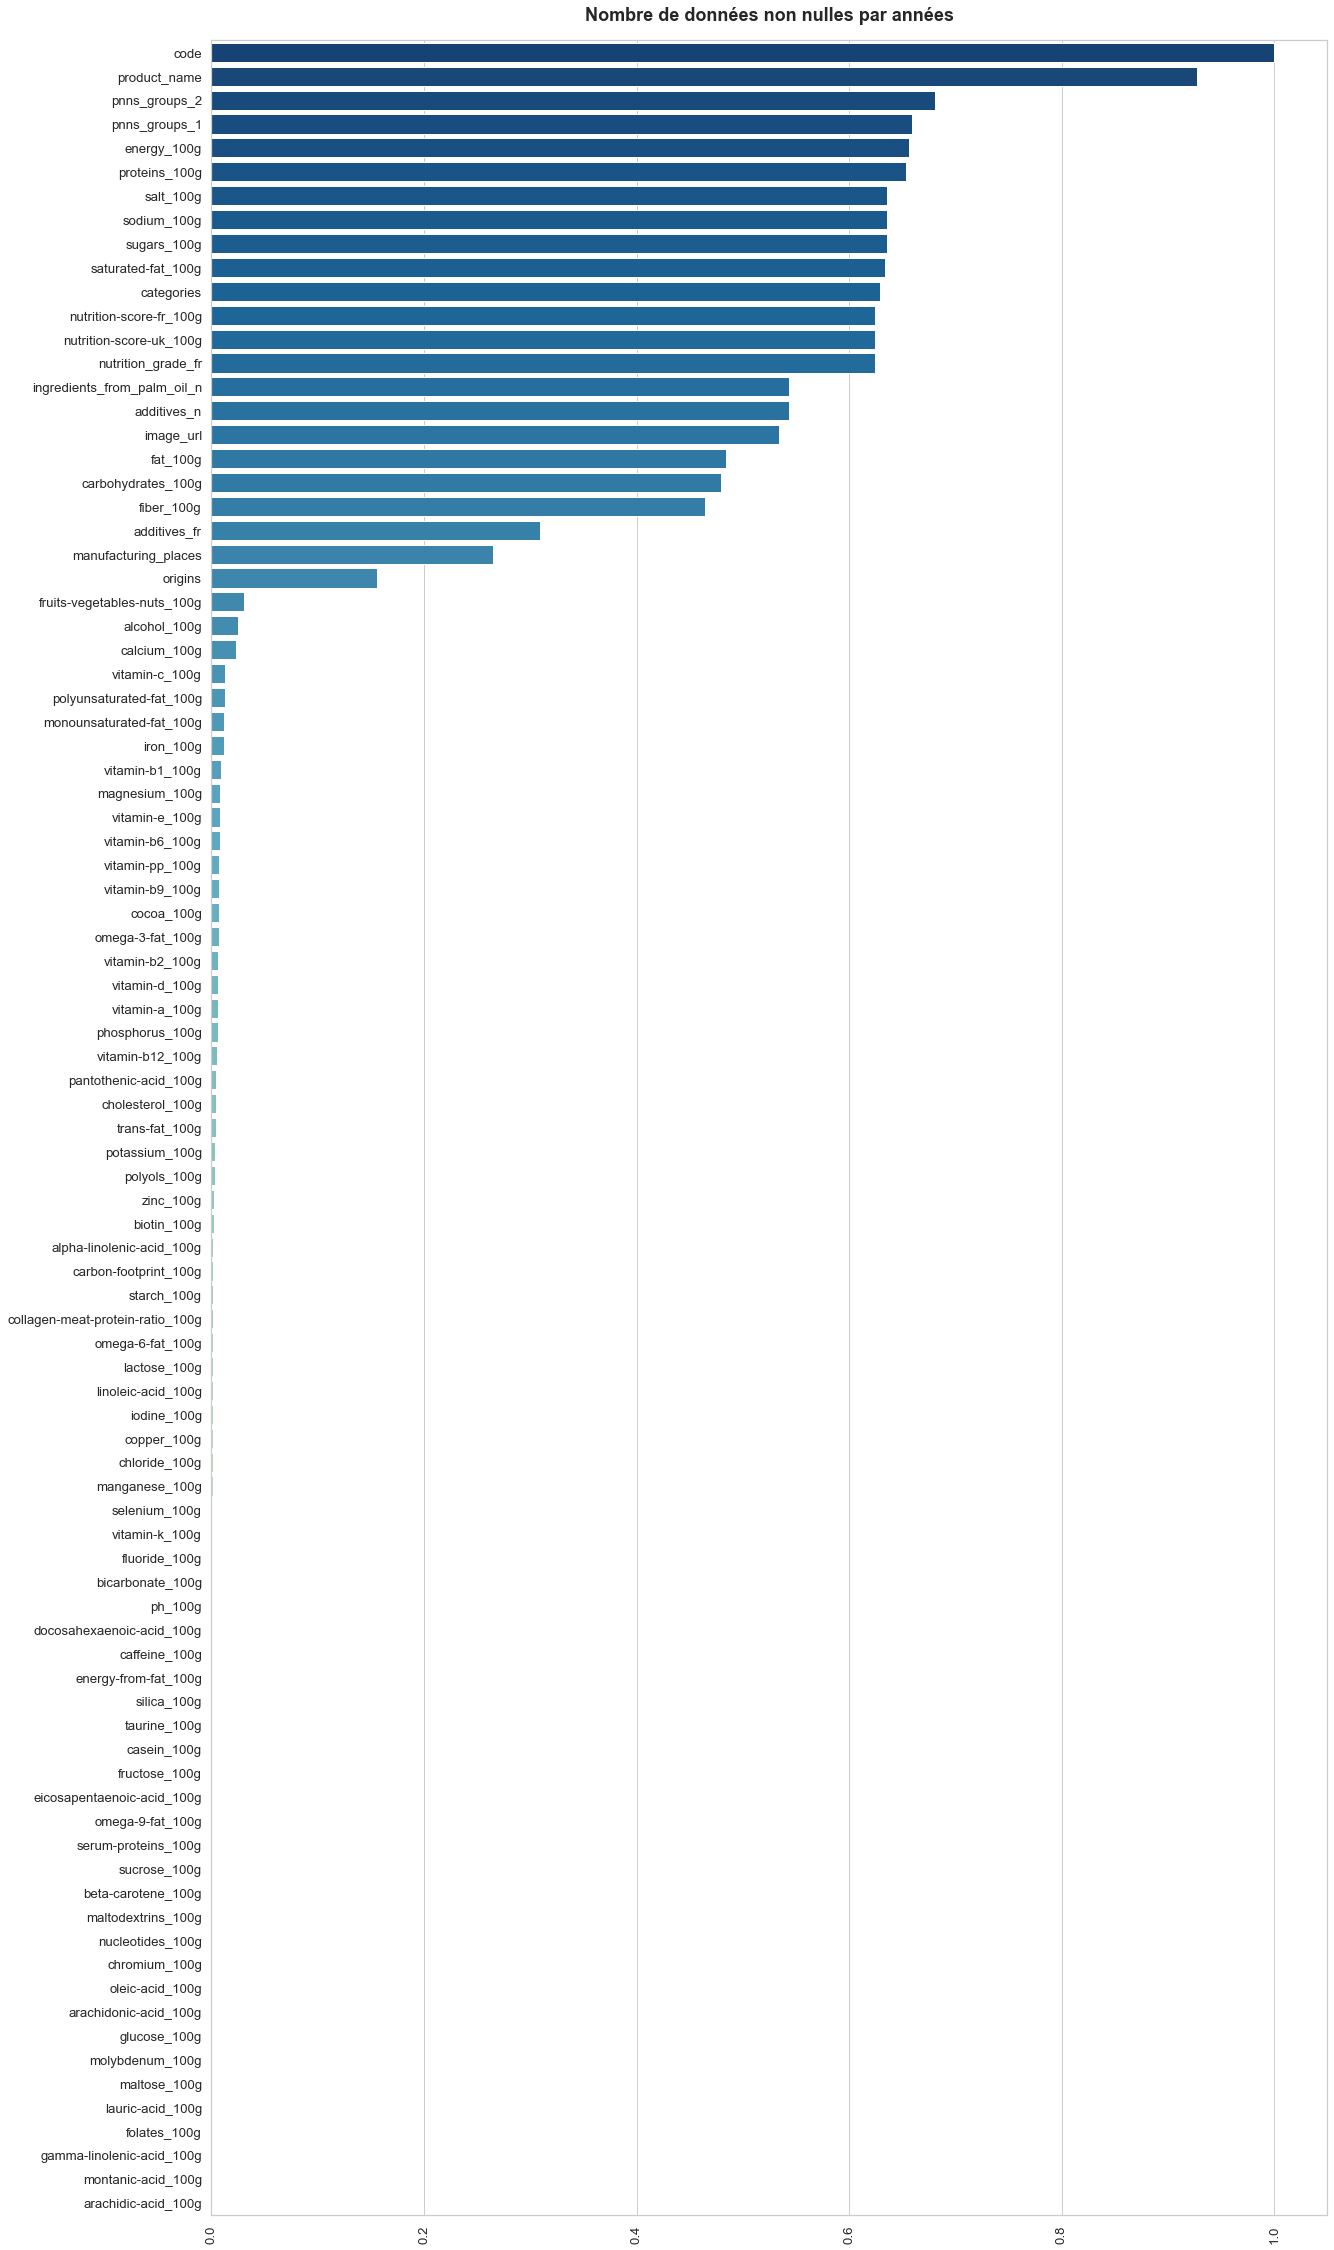

In [20]:
plt.figure(figsize=(20, 40))
ax = sns.barplot(cols_filling_rate.values, cols_filling_rate.index, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

On garde les colonnes ayant un taux de remplissage suppérieur à 20% :

In [21]:
df_data_fr.drop(columns=cols_filling_rate[cols_filling_rate < 0.20].index, inplace=True)
df_data_fr = df_data_fr.drop(columns = "nutrition-score-uk_100g")

In [22]:
df_data_fr.sample(2)

,code,image_url,product_name,pnns_groups_1,pnns_groups_2,manufacturing_places,categories,nutrition_grade_fr,additives_n,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
234852,3477730001602,http://fr.openfoodfacts.org/images/products/347/773/000/1602/front.8.400.jpg,Noir Framboises,Sugary snacks,Chocolate products,France,"Sugary snacks,Chocolates,Dark chocolates",e,1.00,E322 - Lécithines,0.00,2238.00,33.00,20.00,49.00,45.00,9.00,6.60,0.02,0.01,20.00
231662,3415585803019,http://fr.openfoodfacts.org/images/products/341/558/580/3019/front.3.400.jpg,Triple sensations speculoos caramel desire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nettoyage par produits

- Traitement des produits peu renseignés
- Données aberrantes
- Données manquantes (hors nutri-score et nutri-grade)

In [23]:
df_data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98468 entries, 0 to 320770
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         98468 non-null  object 
 1   image_url                    52558 non-null  object 
 2   product_name                 91286 non-null  object 
 3   pnns_groups_1                64905 non-null  object 
 4   pnns_groups_2                67063 non-null  object 
 5   manufacturing_places         26113 non-null  object 
 6   categories                   61981 non-null  object 
 7   nutrition_grade_fr           61451 non-null  object 
 8   additives_n                  53501 non-null  float64
 9   additives_fr                 30473 non-null  object 
 10  ingredients_from_palm_oil_n  53501 non-null  float64
 11  energy_100g                  64627 non-null  float64
 12  fat_100g                     47677 non-null  float64
 13  saturated-fat_1

## Suppression des produits sans noms

On supprime les produits sans "nom de produit" renseigné :

In [24]:
print('Nombre de produits sans nom renseigné : {}'.format(len(df_data_fr[df_data_fr['product_name'].isnull()])))
df_data_fr = df_data_fr[df_data_fr['product_name'].notnull()]

Nombre de produits sans nom renseigné : 7182


## Suppression des produits sans indicateurs nutritionnel

Récupération des colonnes numériques :

In [25]:
# nutrition columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# filter
df_nutri = df_data_fr.select_dtypes(include=numerics)

Récupération des colonnes nutrionnelles :

In [26]:
nutri_cols_all = df_nutri.columns.tolist()
nutri_cols_all.remove('additives_n')
nutri_cols_all.remove('ingredients_from_palm_oil_n')

Colonnes nutrionnelles hors nutri-score :

In [27]:
nutri_cols = nutri_cols_all.copy()
nutri_cols.remove('nutrition-score-fr_100g')
print(nutri_cols)

['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


Suppression des produits sans valeurs nutritionnelles :

In [28]:
df_data_fr.dropna(subset=nutri_cols, how='all',inplace=True)
df_data_fr.shape

(64880, 21)

> En supprimant les produits sans valeurs nutritionnelles, on récupère un jeux de données de plus de 64000 produits.

# Traitement des valeurs abérantes

In [29]:
df_data_fr.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,44338.00,44338.00,64257.00,47326.00,62060.00,46892.00,62196.00,45523.00,63985.00,62254.00,62251.00,61028.00
mean,2.01,0.08,1170.84,13.34,5.43,27.73,13.42,2.56,7.76,1.16,0.46,8.69
std,2.61,0.27,12866.49,16.94,8.54,27.42,19.08,4.64,7.89,4.30,1.69,9.04
min,0.00,0.00,0.00,0.00,0.00,0.00,-0.10,0.00,0.00,0.00,0.00,-15.00
25%,0.00,0.00,427.00,1.30,0.30,4.00,1.00,0.00,1.80,0.08,0.03,1.00
50%,1.00,0.00,1035.00,6.80,2.00,14.50,4.10,1.30,6.00,0.56,0.22,9.00
75%,3.00,0.00,1649.00,21.00,7.40,53.00,17.72,3.20,11.00,1.24,0.49,15.00
max,31.00,2.00,3251373.00,380.00,210.00,190.00,105.00,178.00,100.00,211.00,83.00,40.00


Plusieurs variables présentent des valeurs abérantes dans le dataset. Par exemple, "energy_100g" possède des valeurs excessives (max) ou encore "sugars_100g" des valeurs négatives.

**Colonnes devant être entre 0 et 100 :**

In [30]:
nutri_cols_ne = nutri_cols.copy()
nutri_cols_ne.remove('energy_100g')

In [31]:
print(nutri_cols_ne)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


## Suppresion des energy abérantes

Pour déterminer les valeurs abbérantes en "energy", on se base sur la valeur maximum qu'un aliment peut apporter. Le [Site de Nutrisens](https://www.nutrisens.com/vitalites/comment-decrypter-les-valeurs-nutritionnelles/) fournit le détail des valeurs nutritionnels:
- 1g de Glucides = 17 kJ
- 1g de lipide = 38 KJ
- 1g de protéine = 17 kJ
Donc pour 100g d'aliment, la valeurs énergétique est au maximum de 3800 kJ

**Suppression des valeurs au dessus de 3800 KJ:**

In [32]:
df_data_fr = df_data_fr[df_data_fr['energy_100g'] < 3800]

**Distribution des valurs "energy" restantes:**

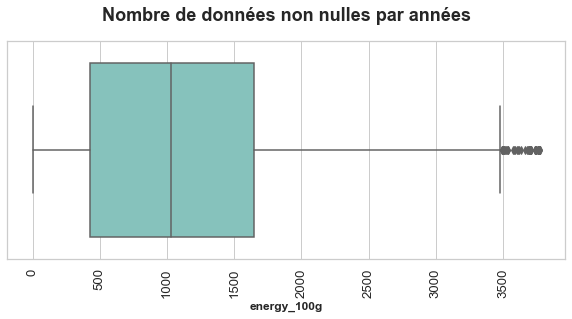

In [33]:
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x=df_data_fr["energy_100g"], palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [34]:
df_data_fr.shape

(64167, 21)

## Suppression des valeurs nutritionnelles négatives

In [35]:
for col in nutri_cols_ne:
    df_data_fr = df_data_fr.drop(df_data_fr.index[df_data_fr[col] < 0])
df_data_fr.shape

(64166, 21)

## Suppression des valeurs nutritionnelles suppérieur à 100

In [36]:
for col in nutri_cols_ne:
    df_data_fr = df_data_fr.drop(df_data_fr.index[df_data_fr[col] > 100])
df_data_fr.shape

(64157, 21)

## Cohérence des indicateurs

### Graisse

La quantité de graisse saturée ne peut pas être suppérieur à la quantité de graisse présente dans le produits.

In [37]:
df_data_fr = df_data_fr.drop(
    df_data_fr[df_data_fr['saturated-fat_100g'] < df_data_fr['fat_100g']].index)
df_data_fr.shape

(23976, 21)

### Sucres

Les carbohydrates (glucose) sont des dérivés du sucre. Par conséquent, la quantité de carbohydrates ne peut pas être suppérieur à la quantité de sucre présente dans le produits.

In [38]:
df_data_fr = df_data_fr.drop(
    df_data_fr[df_data_fr['carbohydrates_100g'] < df_data_fr['sugars_100g']].index)
df_data_fr.shape

(23955, 21)

### Sel

In [39]:
df_data_fr = df_data_fr.drop(
    df_data_fr[df_data_fr['sodium_100g'] > df_data_fr['salt_100g']/2.4].index)
df_data_fr.shape

(23955, 21)

Vérification :

In [40]:
df_data_fr.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,6981.00,6981.00,23955.00,6653.00,21723.00,6811.00,22039.00,20147.00,23732.00,22108.00,22108.00,21596.00
mean,1.89,0.02,995.49,3.21,4.57,26.25,15.97,2.02,6.62,1.26,0.50,8.67
std,2.58,0.15,785.82,9.84,8.99,30.73,22.17,5.21,8.61,5.93,2.34,8.70
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-13.00
25%,0.00,0.00,259.00,0.00,0.00,4.60,1.20,0.00,0.50,0.02,0.01,1.00
50%,1.00,0.00,879.00,0.00,0.80,11.00,6.00,0.00,4.00,0.18,0.07,8.00
75%,3.00,0.00,1561.00,0.50,5.07,49.00,20.00,2.20,9.00,1.00,0.39,15.00
max,20.00,2.00,3774.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,39.37,36.00


---

# Traitement des valeurs manquantes

In [41]:
df_data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23955 entries, 138 to 320763
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         23955 non-null  object 
 1   image_url                    7614 non-null   object 
 2   product_name                 23955 non-null  object 
 3   pnns_groups_1                10074 non-null  object 
 4   pnns_groups_2                10154 non-null  object 
 5   manufacturing_places         2631 non-null   object 
 6   categories                   9358 non-null   object 
 7   nutrition_grade_fr           21596 non-null  object 
 8   additives_n                  6981 non-null   float64
 9   additives_fr                 4117 non-null   object 
 10  ingredients_from_palm_oil_n  6981 non-null   float64
 11  energy_100g                  23955 non-null  float64
 12  fat_100g                     6653 non-null   float64
 13  saturated-fat

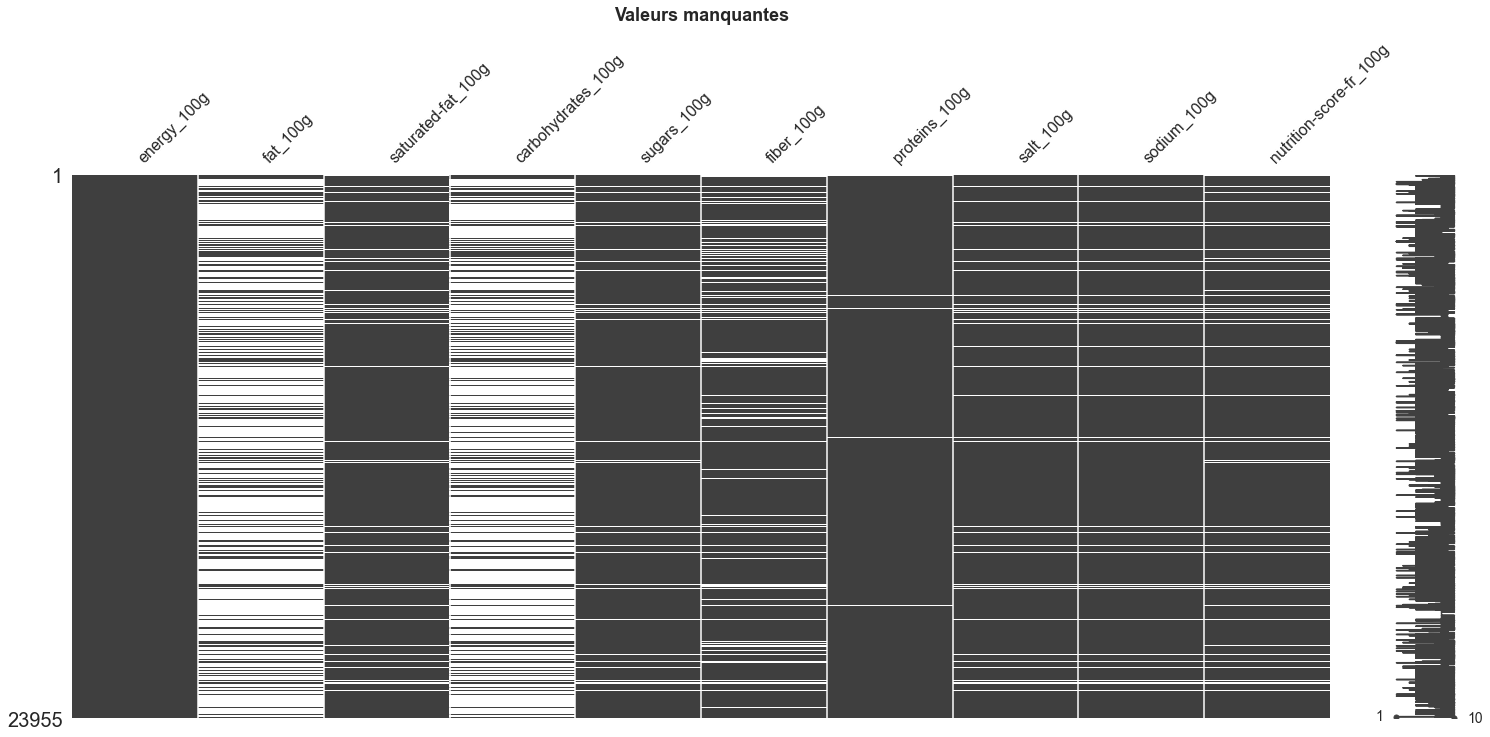

In [42]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

> Afin de pouvoir définir les nutri-score et nutri-grade manquantes, nous devons faire un traitement des valeurs manquantes du jeux de données de travail.

**Méthode :**  

Pour le traitement de ces valeurs manquantes, nous allons comparer 3 méthodes de remplacement :
- Par la valeur médianne de chacun des sous-groupe de produits (moins sensibles aux valeurs extrèmes)
- Par KNNImputer
- Par Iterative Imputer


## Traitement par catégorie de produits

L'idée est de remplacer les valeurs manquantes des valeurs nutritionnels par les medianes des groupes respectifs.

In [43]:
print(df_data_fr['pnns_groups_1'].unique())

['unknown' nan 'Beverages' 'Composite foods' 'Fat and sauces'
 'Fruits and vegetables' 'Sugary snacks' 'Salty snacks'
 'Cereals and potatoes' 'Fish Meat Eggs' 'Milk and dairy products'
 'fruits-and-vegetables' 'sugary-snacks']


In [44]:
print(df_data_fr['pnns_groups_2'].unique())

['unknown' nan 'Sweetened beverages' 'One-dish meals'
 'Non-sugared beverages' 'Dressings and sauces' 'Fruits' 'Sweets' 'Nuts'
 'Fruit juices' 'Breakfast cereals' 'Cereals' 'Dried fruits' 'Sandwich'
 'Chocolate products' 'Vegetables' 'Fish and seafood' 'Cheese'
 'Processed meat' 'Meat' 'Artificially sweetened beverages'
 'Fruit nectars' 'Bread' 'Biscuits and cakes' 'Alcoholic beverages'
 'Pizza pies and quiche' 'Legumes' 'vegetables' 'Fats' 'Appetizers'
 'Milk and yogurt' 'Ice cream' 'Soups' 'Dairy desserts' 'pastries'
 'Potatoes' 'Tripe dishes' 'Eggs' 'fruits' 'Salty and fatty products']


On observe que des produits non pas de catégories renseignés. Pour le calcul de chacune des **médianes des sous catégories**, nous filtrons donc les produits ayant un catégorie et des valeurs non nulles.

In [45]:
df_data_grp = df_data_fr.copy()

In [46]:
for col in nutri_cols_ne:
    df_data_grp[col] = df_data_grp[col].fillna(df_data_grp.groupby(['pnns_groups_1','pnns_groups_2'])[col].transform('median'))

In [47]:
df_data_grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23955 entries, 138 to 320763
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         23955 non-null  object 
 1   image_url                    7614 non-null   object 
 2   product_name                 23955 non-null  object 
 3   pnns_groups_1                10074 non-null  object 
 4   pnns_groups_2                10154 non-null  object 
 5   manufacturing_places         2631 non-null   object 
 6   categories                   9358 non-null   object 
 7   nutrition_grade_fr           21596 non-null  object 
 8   additives_n                  6981 non-null   float64
 9   additives_fr                 4117 non-null   object 
 10  ingredients_from_palm_oil_n  6981 non-null   float64
 11  energy_100g                  23955 non-null  float64
 12  fat_100g                     10200 non-null  float64
 13  saturated-fat

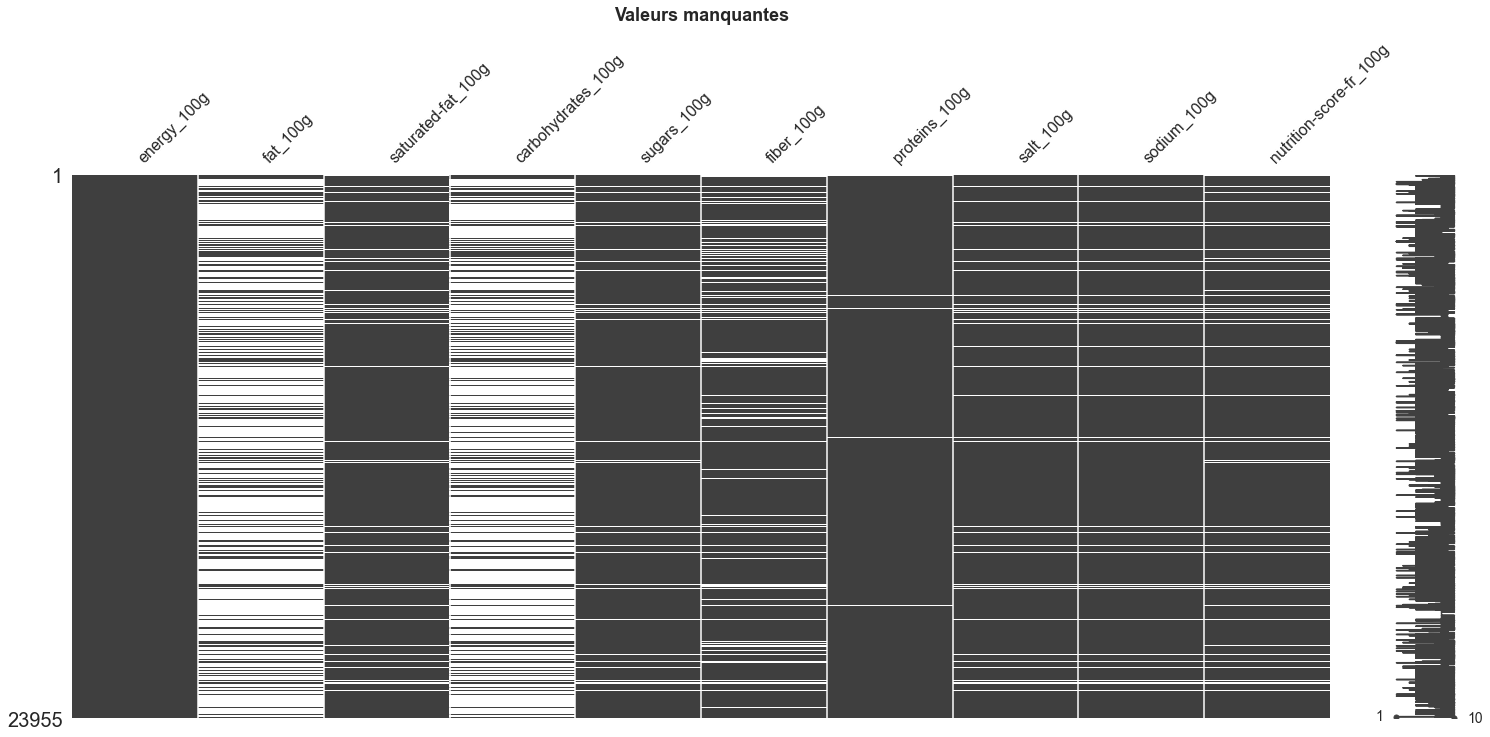

In [48]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

> Un traitement par catégorie n'est pas satisfaisant car le jeux de données présente encore des valeurs manquantes. On se dirige donc vers une autre méthode.

## Traitement par inputation

Récupération des données non nulles :

In [49]:
df_data = df_data_fr[nutri_cols_ne]

df_data_no_nan = df_data_fr.dropna()

### KNN Imputer

Ici, on utilise **KNNImputer** plutôt qu'une fonction Pandas pour faire de l'imputation car on va utiliser **GridSearchCV** afin d'opitmiser le modèle.

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

Paramètre par défaut :

In [51]:
params = {
    'knnimputer__n_neighbors' : np.arange(1,20)
}

**Meilleurs hyperparamètres :**

Training et testing set:

In [52]:
X = df_data_no_nan[nutri_cols_ne]
y = df_data_no_nan['nutrition-score-fr_100g']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(250, 8)
(108, 8)


Optimisation via GridSearchCV :

In [53]:
model = make_pipeline(KNNImputer(), SGDClassifier())
skf = StratifiedKFold(n_splits=10, shuffle=True)

grid = GridSearchCV(model, param_grid = params, cv = skf)   #cv : cross-validation
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Meilleur paramètre :

In [54]:
best_params = grid.best_params_
Y_pred = grid.predict(X_test)

print(best_params)

{'knnimputer__n_neighbors': 18}


**Modèle optimisé :**

In [55]:
imputer = KNNImputer(n_neighbors = grid.best_params_['knnimputer__n_neighbors'])
data_filled = imputer.fit_transform(df_data)
df_data[:] = data_filled

**Remplacement des valeurs manquantes :**

In [56]:
df_data_fr[nutri_cols_ne] = df_data[nutri_cols_ne]

Visualisation des valeurs manquantes :

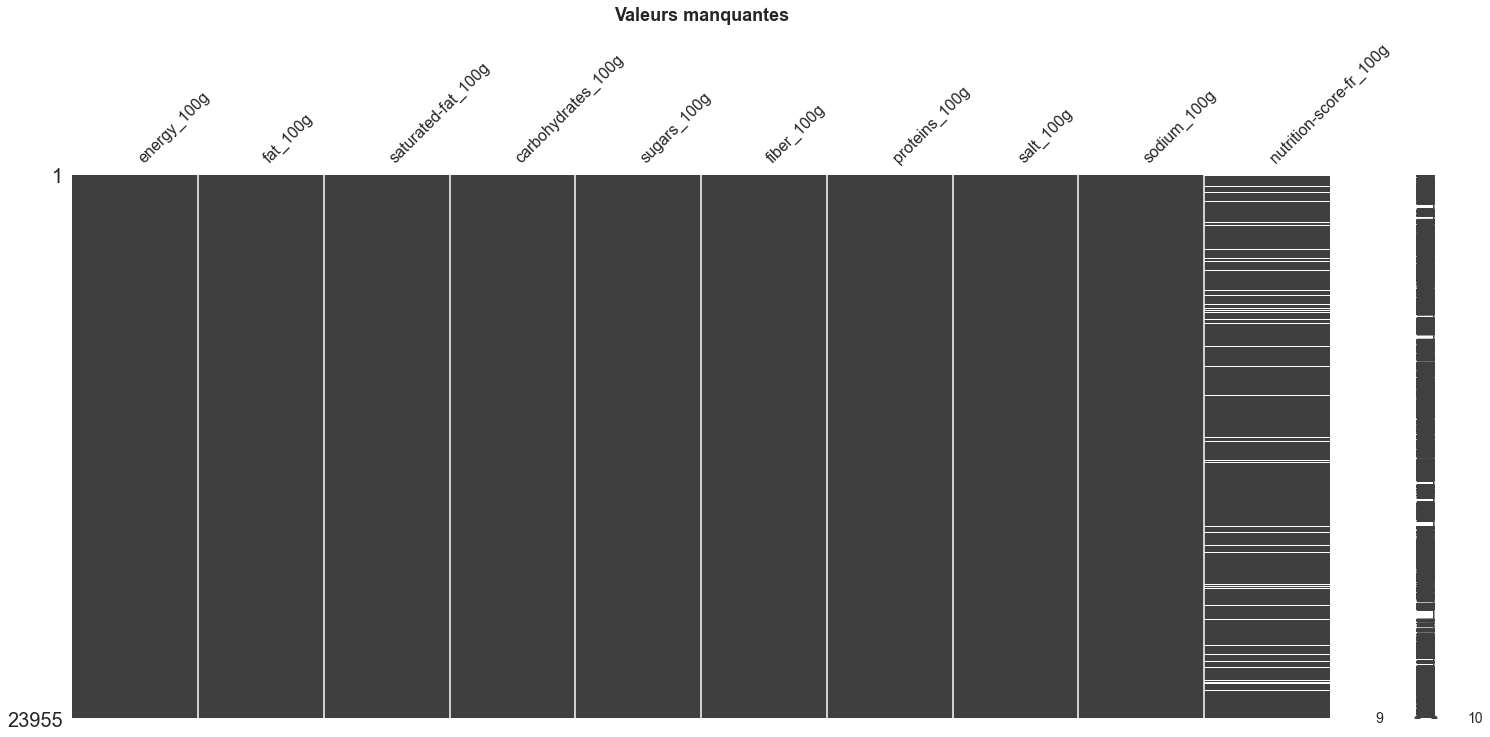

In [57]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

> Les valeurs manquantes ont été renseignées.

### IterativeImputer

Fonctionne de manière pertinentes sur des variables corrélées entre elles.

In [58]:
df_data = df_data_fr[nutri_cols_ne]

**Corrélations :**

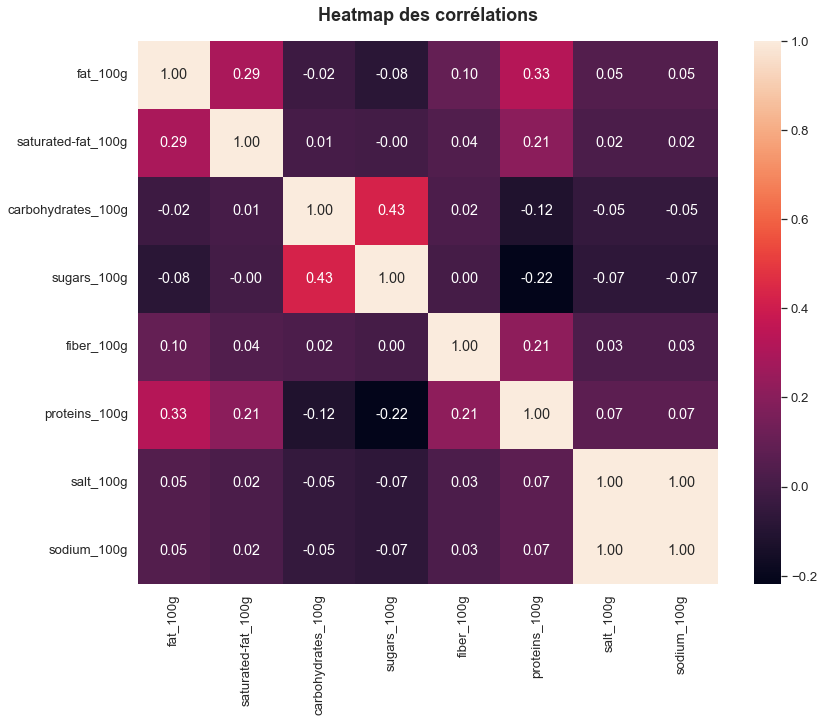

In [59]:
matrix = df_data.corr(method='pearson')

mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(13, 10))
sns.heatmap(matrix, annot=True, fmt=".2f")
plt.title("Heatmap des corrélations", pad=20)
plt.show()

**Création du modèle :**

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [61]:
df_data_ii_imputed = df_data.copy(deep=True)

ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=10, random_state=1121218
)

**Remplacement des valeurs manquantes :**

In [62]:
df_data_ii_imputed.loc[:, :] = ii_imp.fit_transform(df_data_ii_imputed)

**Visualisation :**

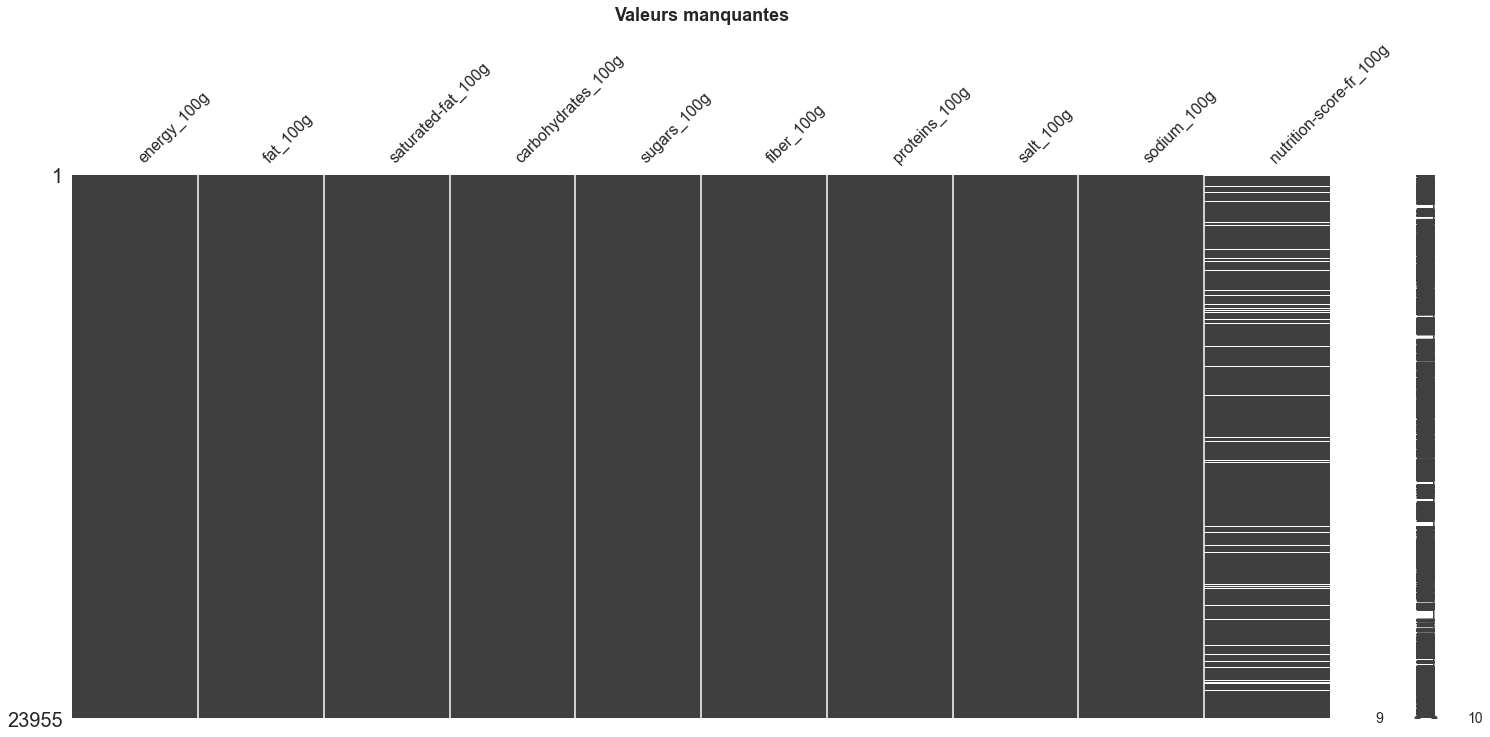

In [63]:
msno.matrix(df_data_fr[nutri_cols_all])
plt.title("Valeurs manquantes", pad=20)
plt.show()

> Le but était d'avoir toutes les colonnes remplies et permettre de déterminer le nutri-score.

**Méthode :**  

Pour déterminer les nutri-scores manquants, nous allons comparer 2 méthodes :
- Régression linéaire
- KNN Regressor


## Traitement des nutri-scores manquants

Nous avons un jeux de données ne comportant plus de données manquantes nutritionnelles (hors nutri-score et nutri-grade). A partir de ces données, nous allons déterminer les nutri-scores manquants.

**Données de travail :**

In [64]:
df_data_regr = df_data_fr[nutri_cols_all]
df_data_regr = df_data_regr[df_data_regr['nutrition-score-fr_100g'].notnull()]


# Récupération des valeurs
X = df_data_regr[nutri_cols]

# Valeurs cibles
y = df_data_regr['nutrition-score-fr_100g']

**Training et testing set :**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(15117, 9)
(6479, 9)


### Régression linéaire

L'analyse va nous permettre de prévoir la valeur du nutri-score en fonction de la valeur des autres variables.

**Création du modèle :**

In [66]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

**Evaluation :**

In [67]:
regr.score(X_test, y_test)

0.5917202566549186

> Le score d'évaluation de la régression linéaire est d'environ 0,6 . 

### KNN Regressor

Ici, la régression basée sur les k plus proches voisins. Notre valeur cible est prédite par interpolation locale aux plus proches voisins des données d'apprentissage.

**Création du modèle :**

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

param_grid = {
    'n_neighbors': np.arange(1,10),
}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)

print('Meilleurs paramètres:',grid.best_params_)
print('Meilleur score:', grid.best_score_)

Meilleurs paramètres: {'n_neighbors': 5}
Meilleur score: 0.707350627982079


**Modèle optimisé :**

In [69]:
knn_regr_model = grid.best_estimator_
knn_regr_model.score(X_test, y_test)

0.7227289139145618

L'optimisation du modèle, nous permet d'avoir un meilleur score de prédiction sur les données tests.

**Courbe d'apprentissage :**

In [70]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(
    knn_regr_model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

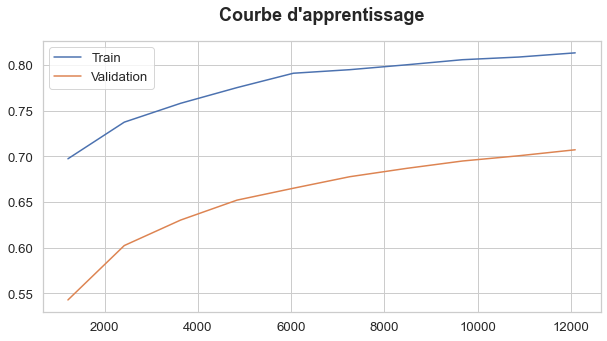

In [71]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot(x = N, y = train_score.mean(axis=1), label="Train")
ax1 = sns.lineplot(x = N, y = val_score.mean(axis=1), label="Validation")
ax.set_title("Courbe d'apprentissage")

plt.show()

**Prédiction et vérification :**

In [72]:
df_data_to_predict = df_data_fr[nutri_cols_all]
df_data_to_predict = df_data_to_predict[df_data_to_predict['nutrition-score-fr_100g'].isnull()]
df_data_to_predict = df_data_to_predict[nutri_cols]

Y_pred = knn_regr_model.predict(df_data_to_predict)

Vérifions que les valeurs soient comprises entre -15 et +40 :

In [73]:
print(min(Y_pred))

-6.4


In [74]:
print(max(Y_pred))

25.0


**Remplacement des valeurs manquantes :**

In [75]:
df_data_to_predict['nutrition-score-fr_100g'] = Y_pred

df_data_to_predict.head(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
138,1481.00,4.17,7.52,77.08,15.93,6.20,6.25,1.37,0.54,-1.00
774,63.00,0.00,0.00,32.44,3.00,0.00,0.86,0.00,0.00,5.20


In [76]:
df_data_fr['nutrition-score-fr_100g'] = df_data_fr['nutrition-score-fr_100g'].fillna(df_data_to_predict['nutrition-score-fr_100g'])

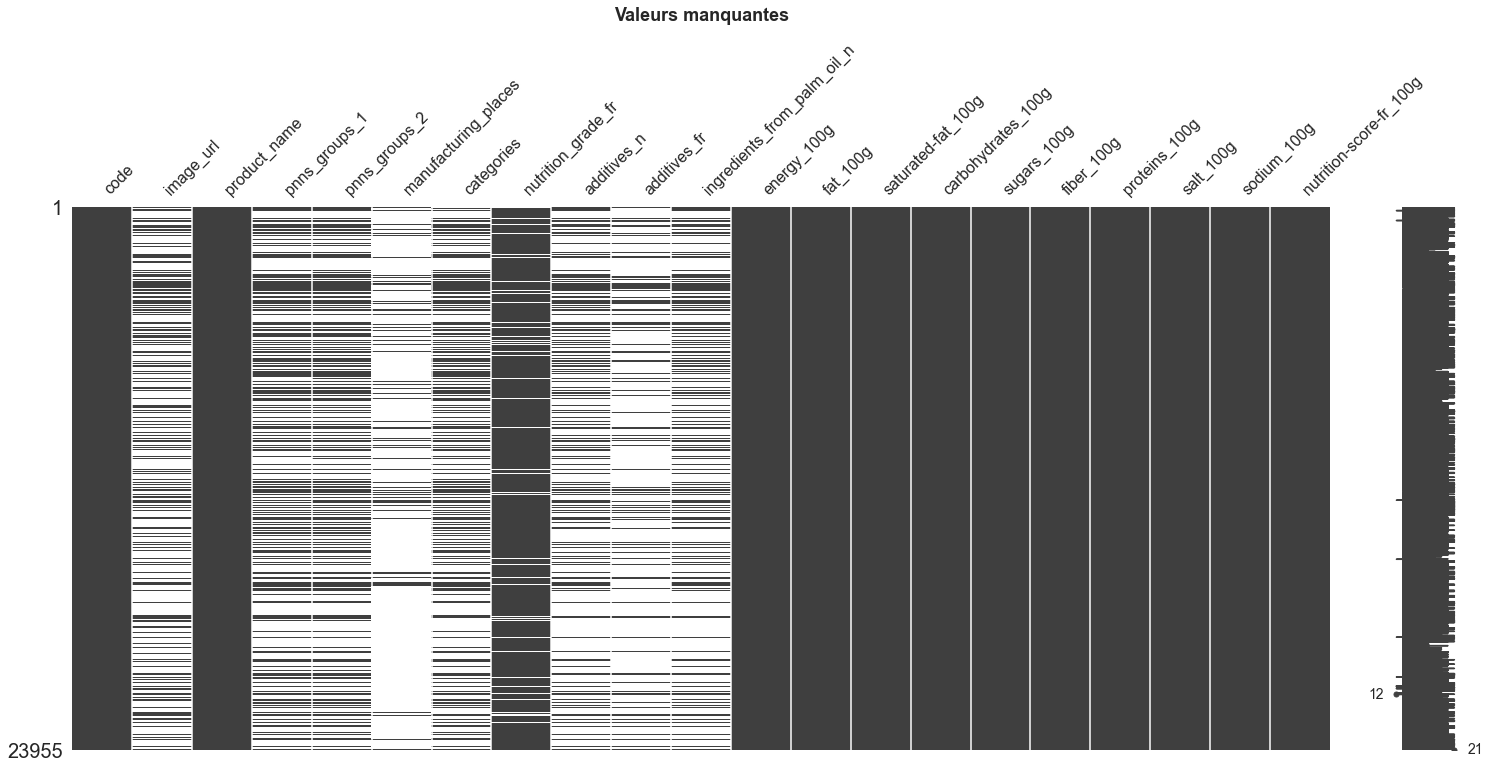

In [77]:
msno.matrix(df_data_fr)
plt.title("Valeurs manquantes", pad=20)
plt.show()

> Le modéle de KNN Regressor créé à un meileur score. Nous gardons donc les nutri-scores de celui-ci.

## Traitement des nutri-grades manquants

Pour définir les nutri-grades, nous choisissons d'utiliser la méthode de classification non supervisées par KNN.

- Nombre de nutri-grades à déterminer :

In [78]:
print(df_data_fr["nutrition_grade_fr"].isnull().sum(axis = 0))

2359


- Nombre de nutri-grade renseigné :

In [79]:
print(df_data_fr["nutrition_grade_fr"].notnull().sum(axis = 0))

21596


### Centrage et réduction

Les variables ne sont pas exprimées dans les mêmes unités. On réalise donc un centrage et une réduction.

In [80]:
from sklearn import preprocessing

**Création du modèle :**

In [81]:
knn_cols = nutri_cols_all.copy()
knn_cols.append("nutrition_grade_fr")

df_temp = df_data_fr[knn_cols]
df_norm = df_temp[nutri_cols_all]

X = df_norm.values
names = df_norm.index

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
df_norm = pd.DataFrame(X_scaled, columns=df_norm.columns)

**Remplassement des valeurs manquantes :**

In [82]:
df_norm["nutrition_grade_fr"] = df_temp["nutrition_grade_fr"]

In [83]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23955 entries, 0 to 23954
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   energy_100g              23955 non-null  float64
 1   fat_100g                 23955 non-null  float64
 2   saturated-fat_100g       23955 non-null  float64
 3   carbohydrates_100g       23955 non-null  float64
 4   sugars_100g              23955 non-null  float64
 5   fiber_100g               23955 non-null  float64
 6   proteins_100g            23955 non-null  float64
 7   salt_100g                23955 non-null  float64
 8   sodium_100g              23955 non-null  float64
 9   nutrition-score-fr_100g  23955 non-null  float64
 10  nutrition_grade_fr       97 non-null     object 
dtypes: float64(10), object(1)
memory usage: 2.0+ MB


In [84]:
print(df_norm['nutrition_grade_fr'].unique())

[nan 'd' 'e' 'c' 'a' 'b']


### KNN

In [85]:
#df_data_knn = df_norm[df_norm['nutrition_grade_fr'].notnull()]
df_data_knn = df_data_fr[df_data_fr['nutrition_grade_fr'].notnull()]

**Création des données d'entraienement :**

In [86]:
# Sélection des valeurs
X = df_data_knn[nutri_cols]

# Sélection de la colonne cible
y = df_data_knn['nutrition_grade_fr']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(15117, 9)
(6479, 9)


**Création du modèle :**

In [88]:
from sklearn import neighbors
from sklearn import metrics

In [89]:
param_grid = {
    'n_neighbors': np.arange(1,10),
}
grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print('Meilleurs paramètres:',grid.best_params_)
print('Meilleur score:', grid.best_score_)

Meilleurs paramètres: {'n_neighbors': 1}
Meilleur score: 0.5950913367883266


**Evaluation :**

In [90]:
knn_model = grid.best_estimator_
knn_model.score(X_test, y_test)

0.6118228121623708

**Courbe d'apprentissage :**

In [91]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(
    knn_model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

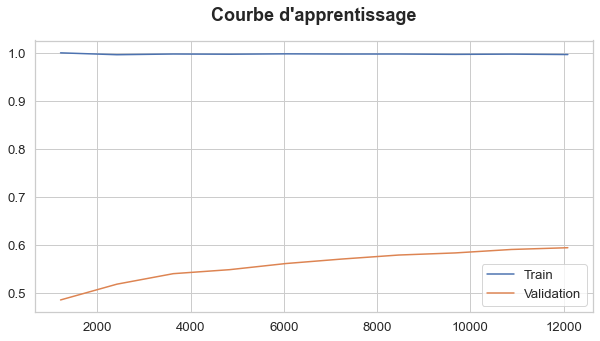

In [92]:
plt.figure(figsize=(10, 5))

ax = sns.lineplot(x = N, y = train_score.mean(axis=1), label="Train")
ax1 = sns.lineplot(x = N, y = val_score.mean(axis=1), label="Validation")
ax.set_title("Courbe d'apprentissage")

plt.show()

**Prédiction sur les données tests:**

In [93]:
y_pred_knn = knn_model.predict(X_test)

In [94]:
print(len(y_pred_knn))

6479


In [95]:
confusion_matrix(y_test, y_pred_knn)

array([[ 598,  177,  104,   31,   10],
       [ 173,  541,  203,   76,   50],
       [ 106,  217,  749,  266,   94],
       [  59,   77,  257, 1123,  239],
       [  17,   39,   80,  240,  953]])

**Evaluation du modèle :**

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

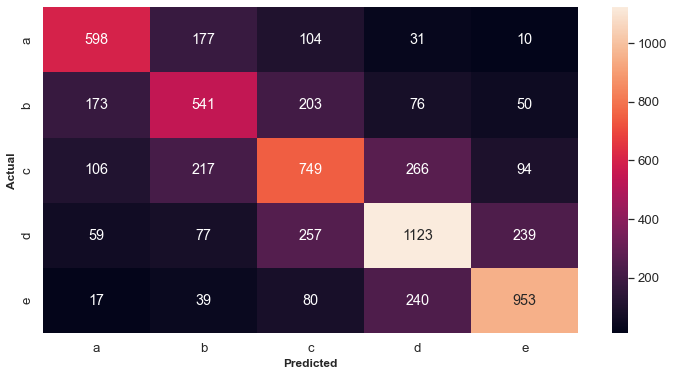

In [96]:
valeurs_uniques, compte_des_valeurs_uniques = np.unique(y_pred_knn, return_counts=True)
cnf_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(cnf_matrix, annot=True, fmt='n')

**Prédiction et vérification :**

In [97]:
df_data_to_predict = df_data_fr[df_data_fr['nutrition_grade_fr'].isnull()]
df_data_to_predict = df_data_to_predict[nutri_cols]

Y_pred = knn_model.predict(df_data_to_predict)

df_data_to_predict['nutrition_grade_fr'] = Y_pred

**Remplacement des valeurs manquantes :**

In [98]:
df_data_fr['nutrition_grade_fr'] = df_data_fr['nutrition_grade_fr'].fillna(df_data_to_predict['nutrition_grade_fr'])

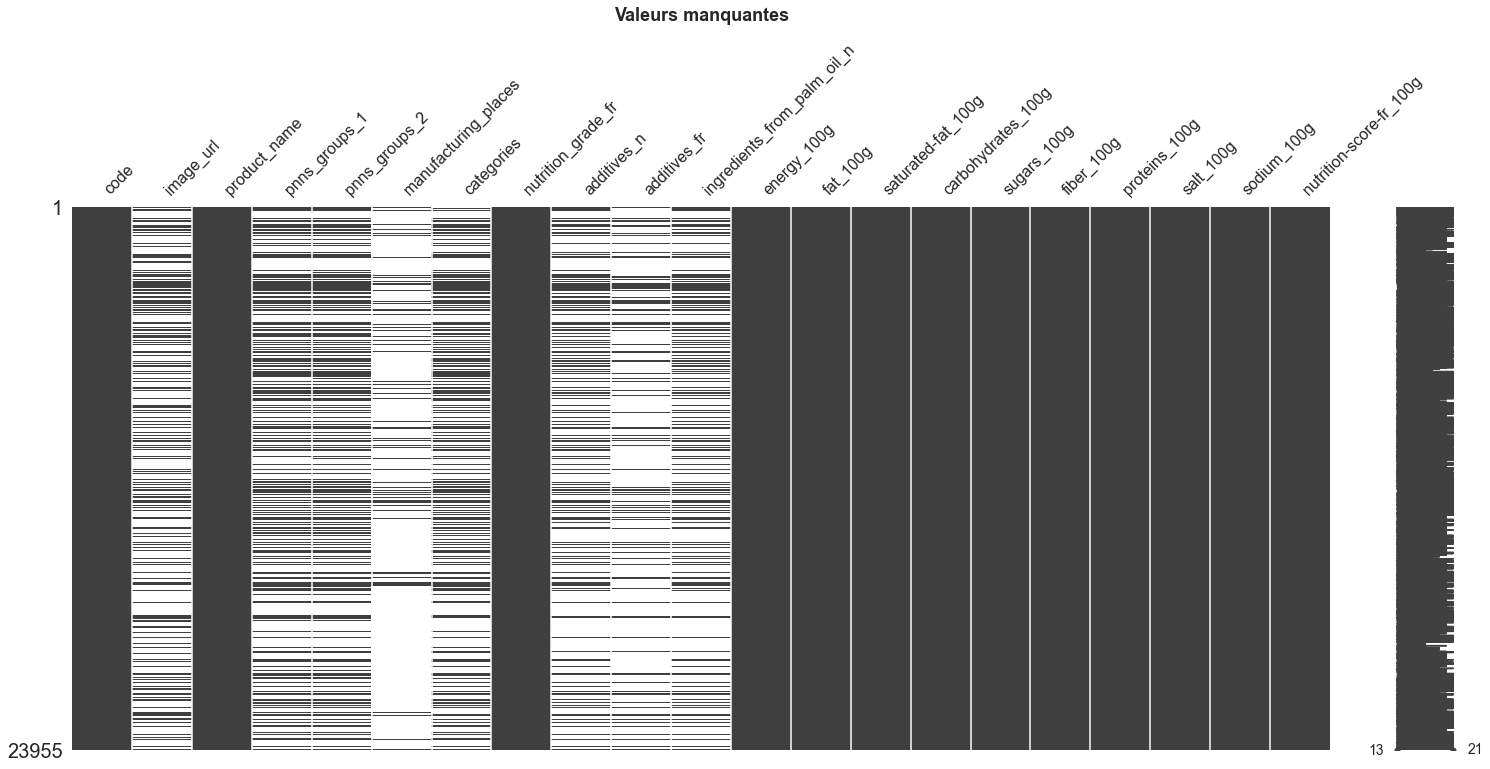

In [99]:
msno.matrix(df_data_fr)
plt.title("Valeurs manquantes", pad=20)
plt.show()

# Export des données nettoyées

In [100]:
df_data_fr.to_csv('data_cleaned.csv', index=False)